In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from plotnine import *
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [2]:
class theme_custom(theme_bw):
    """
    A custom plotnine theme that emulates styling in The New York Times.

    Parameters
    ----------
    base_size : int, optional
        Base font size. All text sizes are a scaled versions of
        the base font size. Default is 11.
    base_family : str, optional
        Base font family.
    """

    def __init__(self, base_size=11, base_family='DejaVu Sans'):
        theme_bw.__init__(self, base_size, base_family)
        self.add_theme(
            theme(axis_text=element_text(size=1.2*base_size),
                  legend_key=element_rect(color='#CCCCCC'),
                  panel_background=element_rect(
                      fill='white'),
                  panel_border=element_rect(
                      fill='None', color='#7f7f7f'),
                  panel_grid_major=element_line(
                      color='#E5E5E5', size=0.8),
                  panel_grid_minor=element_line(
                      color='#FAFAFA', size=1),
                  strip_background=element_rect(
                      fill='#CCCCCC', color='#7F7F7F', size=1)),
            inplace=True)

In [3]:
seaborn_color = sns.color_palette()

In [4]:
df = pd.read_csv('SHERP_tweeter_data_clean.csv')

In [5]:
df2 = pd.read_csv('twitter2018_Werner_data_clean.csv')

In [6]:
df.head()

,gender,name,display_name,bio,favorites_count,followers_count,list_memberships,tweets_retweets_count,following_count,acct_created,location
0,f,BijalPTrivedi,Bijal P Trivedi,"Science journalist, author of Breath from Salt...",0,7,1,1,5,9/8/2020 21:43,Washington DC
1,m,AbeMusselman,Abe Musselman,Science writer and science reader. SHERP 39. H...,180,34,1,23,83,3/9/2020 23:00,NaN
2,f,casey_crownhart,Casey Crownhart,"Reader, writer, plant mom \xf0\x9f\x8c\xb1 SHE...",169,58,1,60,154,10/27/2019 16:36,NaN
3,m,raorr108,Rahul Rao,"Freelance journalist, science writer, and some...",14,59,3,4,40,10/22/2019 14:53,NYC
4,f,Anu__Dave,Anu,Science and technology writer | #sherp38 @nyun...,210,258,2,51,332,10/6/2019 17:55,NYC via Canada


In [7]:
df2.describe()

,Unnamed: 0,id,avg_likes_per_orig_tweet,avg_retweets_per_orig_tweet,following_count,followers_count,female_pct_follower,female_pct_friend,twitter,asstprof,assocprof,prof,academic,yrs_on_twitter,origtweets_year,new_following_year,followers_year,orig_likes_year,orig_rt_year,follower_to_following_ratio
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,901.000000,899.000000,919.0,919.000000,919.000000,919.000000,711.0,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,912.000000
mean,459.000000,459.000000,4.157168,2.710252,352.341676,843.899891,0.533733,0.491091,1.0,0.312296,0.189336,0.272035,1.0,4.813203,83.506366,96.033801,179.802650,437.320116,296.812228,3.154843
std,265.436747,265.436747,4.844645,2.854303,568.921037,2488.272085,0.150105,0.158974,0.0,0.463682,0.391989,0.445250,0.0,2.594099,164.995561,232.361479,459.659980,1006.174841,672.979945,8.546009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,229.500000,229.500000,1.909830,1.555556,65.000000,63.500000,0.425887,0.379065,1.0,0.000000,0.000000,0.000000,1.0,2.750000,5.577778,16.659863,17.833459,14.838321,10.525729,0.624740
50%,459.000000,459.000000,3.103041,2.180180,175.000000,207.000000,0.530184,0.480263,1.0,0.000000,0.000000,0.000000,1.0,4.583334,25.963636,42.620690,53.018180,104.663270,68.531250,1.200000
75%,688.500000,688.500000,4.870266,3.152681,388.500000,635.000000,0.642254,0.596483,1.0,1.000000,0.000000,1.000000,1.0,6.583334,98.634648,96.542205,151.699450,401.245545,266.817595,2.515547
max,918.000000,918.000000,80.313993,40.022727,8032.000000,36767.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,12.083333,3267.428500,4949.143000,6466.285600,12046.506000,8796.238000,150.069380


In [8]:
df.groupby('gender').sum()

,favorites_count,followers_count,list_memberships,tweets_retweets_count,following_count
gender,,,,,
f,1091246,482414,20193,592624,202900
m,457253,266106,11958,405524,71667


In [9]:
df2.groupby('gender').sum()

,Unnamed: 0,id,avg_likes_per_orig_tweet,avg_retweets_per_orig_tweet,following_count,followers_count,female_pct_follower,female_pct_friend,twitter,asstprof,assocprof,prof,academic,yrs_on_twitter,origtweets_year,new_following_year,followers_year,orig_likes_year,orig_rt_year,follower_to_following_ratio
gender,,,,,,,,,,,,,,,,,,,,
female,228656,228656,1889.315154,1175.436870,163537,279229,279.469515,263.436429,492,168,99,103,370.0,2224.333336,34846.020225,46927.040689,60529.961137,155273.782062,102055.573073,848.753086
male,193165,193165,1931.122503,1315.285092,160265,496315,201.424299,178.054746,427,119,75,147,341.0,2199.000000,41896.329801,41328.022423,104708.674172,246623.404487,170714.864774,2028.463690


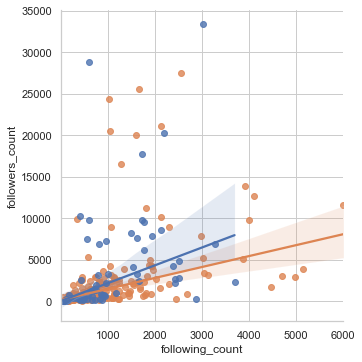

In [10]:
newPalette = dict(m = seaborn_color[0], f = seaborn_color[1])
sns.lmplot(x="following_count", y="followers_count",
                hue="gender",
                data=df, palette=newPalette, fit_reg=True, robust=True, legend=False)
plt.savefig("SHERP_follow_followed.svg", format="svg")

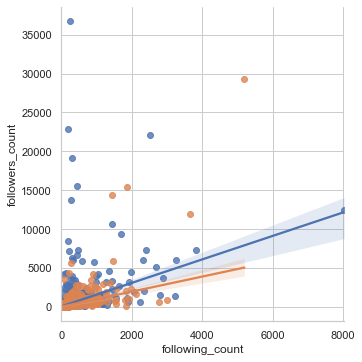

In [11]:
sns.lmplot(x="following_count", y="followers_count",
                hue="gender",
                data=df2, fit_reg=True, robust=True, legend=False)
plt.savefig("twitter_follow_followed.svg", format="svg")

Let's make a beeswarm plot...

C:\Users\corks\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
C:\Users\corks\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


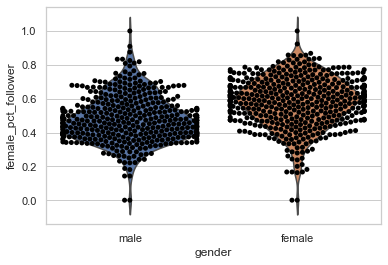

In [12]:
ax = sns.violinplot(x="gender", y="female_pct_follower", data=df2, inner=None)
ax = sns.swarmplot(x="gender", y="female_pct_follower", data=df2,
                   color="black", edgecolor="gray")

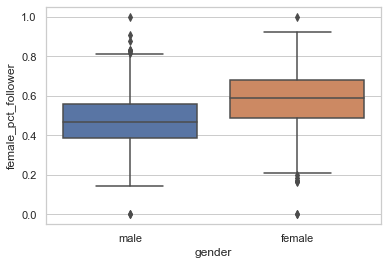

In [13]:
ax = sns.boxplot(x="gender", y="female_pct_follower", data=df2)

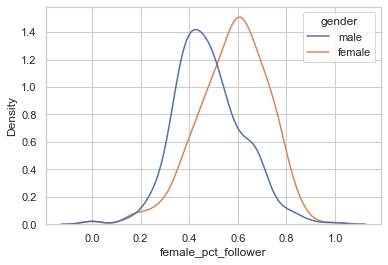

In [14]:
sns.kdeplot(data=df2, x="female_pct_follower", hue="gender")
plt.savefig("kde_percent_follower.svg", format="svg")

In [15]:
p = (
ggplot(df, aes(x='followers_count', group='gender', fill='gender'))
    + geom_density(alpha=0.4)
    + labs(title="Followers for Male and Female SHERPies",
             x="Number of Followers",
             y="Density")
    + theme_538()
    + scale_fill_discrete(name = "Gender", labels = ("Female", "Male"))
)

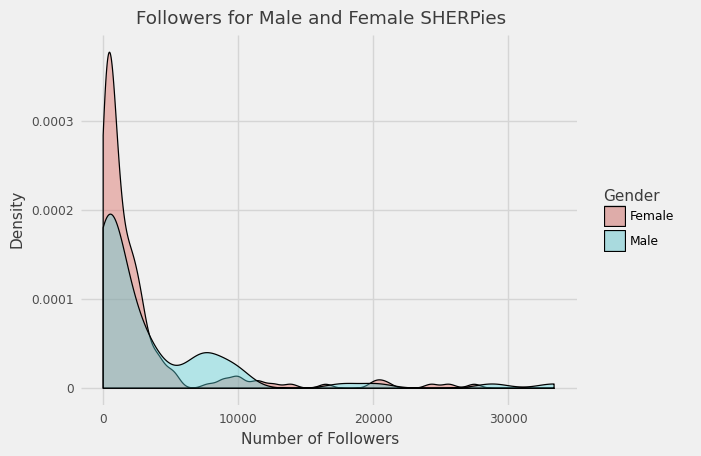

<ggplot: (-9223371907386146084)>

In [16]:
p

In [17]:
p.save("sherp_density_chart.svg")

C:\Users\corks\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\corks\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: sherp_density_chart.svg
